# A Reasonable Introduction to Pandas

By [Allison Parrish](http://www.decontextualize.com/)

[Pandas](http://pandas.pydata.org/) is a Python library that helps you load, analyze and visualize data. It plays especially well with Jupyter Notebook, taking advantage of the notebook format to display data in easy-to-read ways. The data types that come with Pandas are kind of like super-charged lists and dictionaries, with built-in functionality for common tasks in statistics and data analysis that have the potential to run faster than their equivalents written with more familiar Python data types.

The purpose of this tutorial is to give you a taste for how Pandas works. By the end of the tutorial, you'll be able to use Pandas to load some data from a CSV file into a Pandas data frame and use Pandas' data visualization functions to draw a handful of simple graphs. The tutorial is aimed at people who know at least a little bit about how regular Python data types (like lists and dictionaries) work.

## Importing Pandas

To fully take advantage of the capabilities of Pandas, you need to import not just Pandas but a handful of other libraries:

In [357]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('max_rows', 25)
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (10, 4)

The first line is what's known as an [IPython magic](ipython.readthedocs.io/en/stable/interactive/magics.html); it tells the notebook server to display plots inline. The next three lines import Pandas (using the `as` clause to shorten its name to `pd`) and two other libraries, `numpy` and `matplotlib`, in case we need them. The final two lines set some options to make our plots look prettier.

Whenever you start a new notebook and want to use Pandas, it's a good idea to just copy and paste the code from that cell and make it the first cell in your own notebook.

Let's look at a couple of Pandas data types.

## The Series

The `Series` data type in Pandas is like a Python list, in that it stores a sequence of values. But it has a few extra goodies that make it appealing for data analysis.

One way to create a `Series` is to just pass a Python list to `pd.Series()`:

In [175]:
s = pd.Series([5, 5, 5, 10, 10, 12, 15, 15, 23, 27, 30])

In [176]:
s

0      5
1      5
2      5
3     10
4     10
5     12
6     15
7     15
8     23
9     27
10    30
dtype: int64

Unlike Python lists, you can operate on a Series using arithmetic operations. So, for example, you can multiply an entire Series by 0.5:

In [177]:
s * 0.5

0      2.5
1      2.5
2      2.5
3      5.0
4      5.0
5      6.0
6      7.5
7      7.5
8     11.5
9     13.5
10    15.0
dtype: float64

... or create a Series with 100 added to each entry from the original Series:

In [178]:
s + 100

0     105
1     105
2     105
3     110
4     110
5     112
6     115
7     115
8     123
9     127
10    130
dtype: int64

Series support a variety of statistical operations through methods. To get the smallest value in a Series:

In [179]:
s.min()

5

The greatest value:

In [180]:
s.max()

30

The arithmetic mean:

In [181]:
s.mean()

14.272727272727273

Various other operations are supported as well:

In [182]:
s.median()

12.0

In [183]:
s.mode()

0    5
dtype: int64

In [184]:
s.std() # standard deviation

8.866689450870703

In [403]:
s.quantile(0.75) # 75th percentile

19.0

The `.describe()` method gives you some quick insight on the statistical properties of the series as a whole:

In [404]:
s.describe()

count    11.000000
mean     14.272727
std       8.866689
min       5.000000
25%       7.500000
50%      12.000000
75%      19.000000
max      30.000000
dtype: float64

### Plotting Series

Every Series object has a `.plot()` method that will display a plot of the data contained in the series. Very easy!

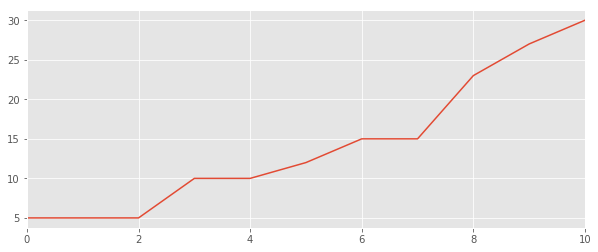

In [186]:
s.plot()

By default, you get a line plot, but the `.plot()` method can take a named parameter `kind` that allows you to specify different types of plots. [There's a full list here](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.plot.html#pandas.Series.plot), but just to demonstrate, here's a bar graph from our test series:

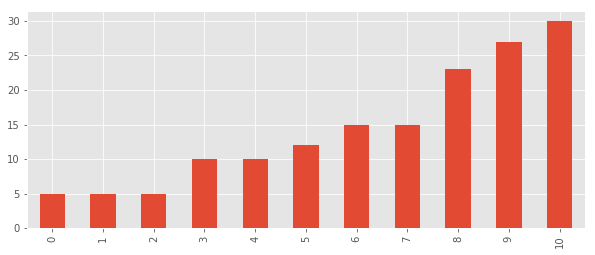

In [460]:
s.plot(kind="bar")

A horizontal bar chart:

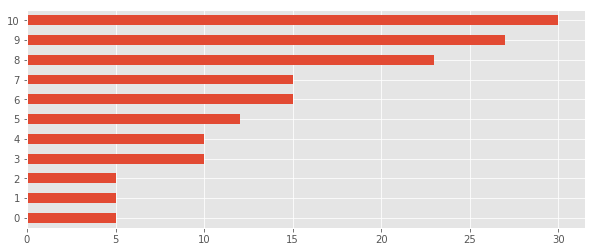

In [462]:
s.plot(kind="barh")

A pie chart:

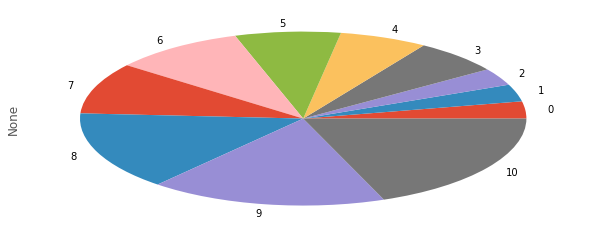

In [464]:
s.plot(kind="pie")

### Series indices don't have to be integers

The default behavior of a Series is to use integers as indices: if you initialize a Series with just a list, then the indices start at 0 and go up to the length of the list (minus 1). But the indices of a Series can be essentially any data type. You can specify the values and indices in a Series by passing them as a dictionary, or as two lists (values first, indices second):

In [205]:
planet_moons = pd.Series(
    [0, 0, 1, 2, 69, 62, 27, 14],
    ['Mercury', 'Venus', 'Earth', 'Mars', 'Jupiter', 'Saturn', 'Uranus', 'Neptune'])

In [207]:
planet_moons

Mercury     0
Venus       0
Earth       1
Mars        2
Jupiter    69
Saturn     62
Uranus     27
Neptune    14
dtype: int64

All the various statistical operations still work, e.g.:

In [209]:
planet_moons.mean()

21.875

Plots work as well:

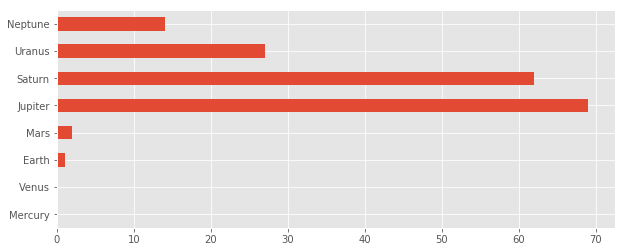

In [466]:
planet_moons.plot(kind="barh")

Even if indices are integers, they don't have to be *sequential* integers. A good example of this is what happens when you use the `.value_counts()` method, which returns a new Series with totals for each unique value (like a Counter object):

In [219]:
s_counts = s.value_counts()
s_counts

5     3
15    2
10    2
30    1
12    1
27    1
23    1
dtype: int64

We'll get back to why this is important in a second...

### Series indexing

To get a particular value from a Series, you can use the square bracket syntax familiar to you from Python lists and dictionaries:

In [154]:
s[0]

5

In [157]:
s[4]

10

Using the slice operator gives you a new Series representing the corresponding slice:

In [220]:
s[1:4]

1     5
2     5
3    10
dtype: int64

This syntax works for Series with non-integer indices as well:

In [221]:
planet_moons["Neptune"]

14

Somewhat weirdly, you can use *slice* syntax with non-integer indices. This is something you can do with a Pandas Series that you *definitely* can't do with a regular list or dictionary:

In [223]:
planet_moons["Mercury":"Jupiter"]

Mercury     0
Venus       0
Earth       1
Mars        2
Jupiter    69
dtype: int64

Even with Series with non-integer indices will allow you to use numerical indices, to refer to the item in the series corresponding to that entry in numerical order:

In [228]:
planet_moons[5]

62

In [230]:
planet_moons[:4]

Mercury    0
Venus      0
Earth      1
Mars       2
dtype: int64

### Location versus index

Where this gets *even weirder* is with Series that have non-consecutive integer indices. Recall the result of `.value_counts()` for our original Series `s`:

In [232]:
s_counts

5     3
15    2
10    2
30    1
12    1
27    1
23    1
dtype: int64

It's not clear what the expression `s[5]` should evaluate to: the item at numerical index `5` in the Series, or the value for the index `5`. Let's see what happens:

In [234]:
s_counts[5]

3

It looks like the Series gives us the value for the index `5` (i.e., not the value for the index `27`, which is in the fifth numerical index position). Weird! To avoid this ambiguity, you can use the `.iloc` attribute, which always uses numerical position:

In [238]:
s_counts.iloc[5]

1

### Selecting from a Series

Another way to get portions of a Series is to "select" items from it. Series values support an unusual syntax where you can put a *list* inside of the square bracket indexing syntax, and in that list you can specify which fields in particular you want. So for example:

In [239]:
planet_moons[ ["Jupiter", "Saturn"] ]

Jupiter    69
Saturn     62
dtype: int64

Very weird, right? But it's also quite handy in certain circumstances. You can also pass a list of Boolean values (i.e., `True` or `False`), in which case you'll receive a new Series that only has values for the items in the original series that correspond with a `True` value in the list. That's confusing to explain, but easy to understand if you see it in action:

In [241]:
planet_moons

Mercury     0
Venus       0
Earth       1
Mars        2
Jupiter    69
Saturn     62
Uranus     27
Neptune    14
dtype: int64

In [244]:
planet_moons[ [False, False, False, True, False, False, False, True] ]

Mars        2
Neptune    14
dtype: int64

This feature is of limited utility on its own, but there's another bit of functionality that the Series value gives you that works alongside it. The same way that you can multiply a Series, or add a constant to a Series, you can also use a relational operator on a Series. When you do so, you get back a Series that has `True` for every item that passed the test and `False` for every item that failed. For example:

In [247]:
planet_moons < 20

Mercury     True
Venus       True
Earth       True
Mars        True
Jupiter    False
Saturn     False
Uranus     False
Neptune     True
dtype: bool

If you combine these two features, you can write an expression that returns a Series with only those items that meet particular criteria. For example, the following expression gives us only those planets that have fewer than twenty known moons:

In [254]:
planet_moons[planet_moons < 20]

Mercury     0
Venus       0
Earth       1
Mars        2
Neptune    14
dtype: int64

## The DataFrame

I wanted to discuss the Series data type because you'll see it again and again when you're working with Pandas, and it's important to understand what it is and what it can do. But for the most part when you're working with Pandas, you'll be working with a data type called the `DataFrame`. A `DataFrame` is sort of like a spreadsheet, consisting of rows and columns. As with series, the rows and columns can have labels (i.e., the items have names like they do in the `planet_moons` Series above) and can also be indexed purely by position.

You can create a `DataFrame` by passing in a dictionary, where the keys of the dictionary are the column labels and the values are lists of individual values for each row. Here I'm creating a very simple DataFrame for the [longest rivers in the world](https://en.wikipedia.org/wiki/List_of_rivers_by_length), including their names, their length (in kilometers), their drainage areas (in square kilometers) and their average discharge (in cubic meters per second):

In [283]:
river_data = {
    "Name": ["Amazon", "Nile", "Yangtze", "Mississippi"],
    "Length": [6992, 6835, 6300, 6275],
    "Drainage area": [7050000, 3254555, 1800000, 2980000],
    "Discharge": [209000, 2800, 31900, 16200]
}
river_df = pd.DataFrame(river_data)

Evaluating the DataFrame in Jupyter Notebook displays the data in a nice, clean HTML table:

In [284]:
river_df

,Discharge,Drainage area,Length,Name
0,209000,7050000,6992,Amazon
1,2800,3254555,6835,Nile
2,31900,1800000,6300,Yangtze
3,16200,2980000,6275,Mississippi


You'll notice that the *order* of the indices is (probably) wrong. That's because when you initialize a DataFrame with a dictionary, Pandas sorts the keys alphabetically by default. If you want to specify a different order, use the `columns` named parameter, with a list of the column labels in the order you want:

In [285]:
river_df = pd.DataFrame(river_data, columns=["Name", "Length", "Drainage area", "Discharge"])

In [294]:
river_df

,Name,Length,Drainage area,Discharge
0,Amazon,6992,7050000,209000
1,Nile,6835,3254555,2800
2,Yangtze,6300,1800000,31900
3,Mississippi,6275,2980000,16200


Just as with a Series, you can plot the data in a DataFrame right away using the `.plot()` method. (The `x` named parameter sets the column to use to label each bar; if you do this call without the `x` the bars will be labelled by their row number, which isn't terribly helpful.) By default, all columns are plotted, which isn't super useful, but it *is* easy:

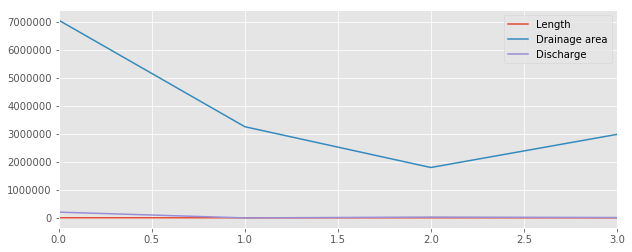

In [457]:
river_df.plot()

That graph doesn't make any sense, and it doesn't make sense for several different reasons:

* The values that we're plotting don't share a common *scale*, so the Y-axis doesn't really tell us anything useful about the Length and Discharge fields, whose scale is dwarfed by the Drainage area field.
* The X-axis ranges from zero to three. This would make sense if we were working with a time series (i.e., a data set with a number of data points recording the same phenomenon over time), but the data we're working with in this example has distinct values that aren't "ordered" in a meaningful sense.

To fix this, we can pass a couple of parameters to the `.plot()` method. For example:

* You can specify individual columns to plot with the `y` named parameter
* You can specify a label to use on the X-axis with the `x` named parameter

Combining these, we can get a nice bar chart of our rivers' discharges, showing that the amount of water but out by the Amazon is truly tremendous:

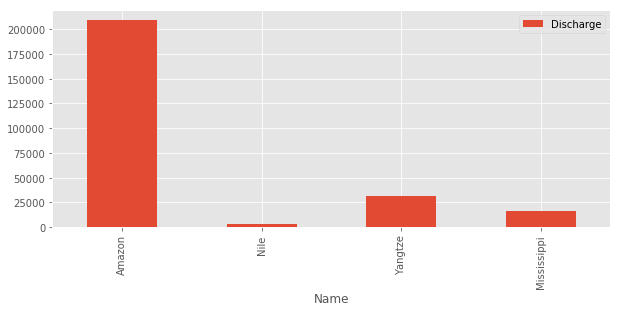

In [468]:
river_df.plot(kind="bar", x="Name", y="Discharge")

### Indexing the DataFrame

When you're working with DataFrames, sometimes you want to *isolate* an individual row or column as a series. In other cases, you want to *construct a new DataFrame* based on a subset of rows or columns from the original DataFrame. Or, you might just want to get a single value at the intersection of a row and column. In other words, there are three different operations, which we can think about in terms of the types involved:

* `DataFrame` → `Series` (i.e., get a column or row)
* `DataFrame` → `DataFrame` (i.e., filter a DataFrame based on rows or columns that meet particular criteria)
* `DataFrame` → single value (i.e., get a number, string, etc. from a particular row/column intersection)

We'll talk about these one by one below.

#### Getting rows and columns as Series objects

Getting a Series from a column of a DataFrame is easy: just use the label of the column in square brackets after the DataFrame:

In [301]:
river_df["Length"]

0    6992
1    6835
2    6300
3    6275
Name: Length, dtype: int64

With the resulting series, you can do any of the statistical operations discussed earlier for Series:

In [302]:
river_df["Length"].max()

6992

You can even plot the series, though it's not terribly useful because we're missing the names of the rivers:

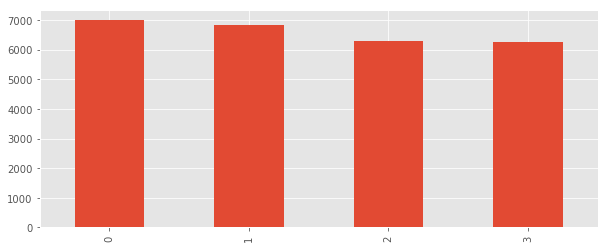

In [469]:
river_df["Length"].plot(kind="bar")

Getting an individual row as a series is also possible. Just use the `.iloc[]` attribute with the numerical index of the row inside the brackets:

In [471]:
river_df.iloc[2]

Name             Yangtze
Length              6300
Drainage area    1800000
Discharge          31900
Name: 2, dtype: object

#### Making new DataFrames from existing DataFrames

You can use the indexing syntax to give you a *new* DataFrame that includes only particular columns and rows from the original DataFrame. If you wanted a new DataFrame that only includes particular columns, then pass a *list* of the columns you want inside the square bracket indexing syntax:

In [472]:
name_length_df = river_df[["Name", "Length"]]

In [473]:
type(name_length_df)

pandas.core.frame.DataFrame

In [474]:
name_length_df

,Name,Length
0,Amazon,6992
1,Nile,6835
2,Yangtze,6300
3,Mississippi,6275


Weirdly, you can use this syntax to get a new DataFrame with just a single column, which is *different* from a Series object:

In [311]:
river_df[["Name"]]

,Name
0,Amazon
1,Nile
2,Yangtze
3,Mississippi


In [313]:
river_df["Name"]

0         Amazon
1           Nile
2        Yangtze
3    Mississippi
Name: Name, dtype: object

To get a new DataFrame with just a subset of rows from the original DataFrame, you can use slice syntax with either row labels or numbers. So to get rows 2 through 4:

In [475]:
a_few_rivers_df = river_df[1:3]

In [476]:
type(a_few_rivers_df)

pandas.core.frame.DataFrame

In [477]:
a_few_rivers_df

,Name,Length,Drainage area,Discharge
1,Nile,6835,3254555,2800
2,Yangtze,6300,1800000,31900


#### Selecting rows with Boolean operators

Just as with Series values, you can use a list of Boolean (i.e., `True` or `False`) values to select particular rows from a DataFrame:

In [478]:
river_df[ [True, False, False, True] ]

,Name,Length,Drainage area,Discharge
0,Amazon,6992,7050000,209000
3,Mississippi,6275,2980000,16200


You can get a list of Boolean values for any column of a DataFrame (as a Series) using the the square brackets to get the column and then a comparison operator:

In [479]:
river_df["Discharge"] > 30000

0     True
1    False
2     True
3    False
Name: Discharge, dtype: bool

Combine the two, and you can write an expression that creates a new DataFrame with only the rows from the original DataFrame that match a particular criterion:

In [480]:
river_df[river_df["Discharge"] > 30000]

,Name,Length,Drainage area,Discharge
0,Amazon,6992,7050000,209000
2,Yangtze,6300,1800000,31900


## Working with real data

Okay, enough playtime, let's work with some real data! Let's load up this [Beijing PM2.5 data set](https://archive.ics.uci.edu/ml/datasets/Beijing+PM2.5+Data). [Download the CSV file using this link](https://archive.ics.uci.edu/ml/machine-learning-databases/00381/PRSA_data_2010.1.1-2014.12.31.csv) and save it in the same folder as your Jupyter Notebook. The data describes several years of hourly weather and pollution readings in Beijing. The people who produced the data also wrote a paper on it:

> [Liang, X., Zou, T., Guo, B., Li, S., Zhang, H., Zhang, S., Huang, H. and Chen, S. X. (2015). Assessing Beijing's PM2.5 pollution: severity, weather impact, APEC and winter heating. Proceedings of the Royal Society A, 471, 20150257.](http://www.stat-center.pku.edu.cn/Stat/Uploads/Files/[20160114_1120]Beijing%20Air-Quality%20Assessment%20Report.pdf).
    
The paper has some technical content, but overall it's very readable and giving it a skim will help you understand the data a bit better.

Pandas makes it *very* easy to use data in CSV format. Just use the `read_csv()` function and pass it the filename of your data:

In [481]:
df = pd.read_csv("./PRSA_data_2010.1.1-2014.12.31.csv")

Pandas does a good job of guessing the correct data types for the values in the CSV file. (If Pandas gets it wrong, though, don't lose hope: [here's a good overview of strategies you can use to clean it up](https://github.com/KarrieK/pandas_data_cleaning).)

Let's take a look at the DataFrame we ended up with:

In [482]:
df

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0
5,6,2010,1,1,5,NaN,-19,-10.0,1017.0,NW,16.10,0,0
6,7,2010,1,1,6,NaN,-19,-9.0,1017.0,NW,19.23,0,0
7,8,2010,1,1,7,NaN,-19,-9.0,1017.0,NW,21.02,0,0
8,9,2010,1,1,8,NaN,-19,-9.0,1017.0,NW,24.15,0,0
9,10,2010,1,1,9,NaN,-20,-8.0,1017.0,NW,27.28,0,0


You can see that because there are so many rows in this DataFrame (43,824!), Pandas shows only a subset. But it's enough for us to get an idea of what the DataFrame looks like.

The `.info()` method shows us the rows and their data types:

In [484]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 13 columns):
No       43824 non-null int64
year     43824 non-null int64
month    43824 non-null int64
day      43824 non-null int64
hour     43824 non-null int64
pm2.5    41757 non-null float64
DEWP     43824 non-null int64
TEMP     43824 non-null float64
PRES     43824 non-null float64
cbwd     43824 non-null object
Iws      43824 non-null float64
Is       43824 non-null int64
Ir       43824 non-null int64
dtypes: float64(4), int64(8), object(1)
memory usage: 4.3+ MB


The `int64`, `float64`, etc. data types are specific to Pandas, and are not the same thing as their regular Python equivalent. (Actually, they're specific to [Numpy](http://www.numpy.org/), but that's a different story.)

Of course, Pandas can't tell us what the data in these columns *mean*. For that, we need to consult the documentation that accompanies the data. Copying and pasting from the web page linked to above, here are the meanings for each field:

* No: row number
* year: year of data in this row
* month: month of data in this row
* day: day of data in this row
* hour: hour of data in this row
* pm2.5: PM2.5 concentration (ug/m^3)
* DEWP: Dew Point (deg C)
* TEMP: Temperature (deg C)
* PRES: Pressure (hPa)
* cbwd: Combined wind direction
* Iws: Cumulated wind speed (m/s)
* Is: Cumulated hours of snow
* Ir: Cumulated hours of rain

> Note that these aren't *universal* names for these fields. You can't expect to download a different data set from another set of researchers that records similar phenomena and expect that file to use (e.g.) `TEMP` as the column name for temperature.

As with Series in general, we can grab one of these columns and use `.describe()` to get a general overview of what data it contains:

In [487]:
df["pm2.5"].describe()

count    41757.000000
mean        98.613215
std         92.050387
min          0.000000
25%         29.000000
50%         72.000000
75%        137.000000
max        994.000000
Name: pm2.5, dtype: float64

This tells us, e.g., that the "average" level of PM2.5 concentration in Beijing over the four-year period of the data was 98.6, with half of days being over 72 and half under. The highest PM2.5 recorded in the data was 994.

Looking at the plot for the `pm2.5` column, you can kind of make out yearly cycles in PM2.5 concentration:

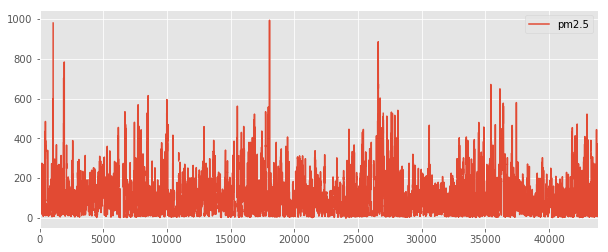

In [488]:
df.plot(y="pm2.5")

We can do the same analysis with the other fields. For example, here's a plot of temperature readings for each hour:

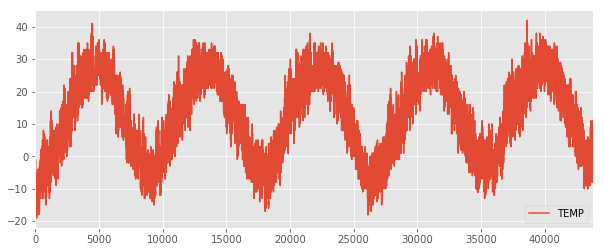

In [490]:
df.plot(y="TEMP")

Plotting these two together shows an interesting pattern, maybe:

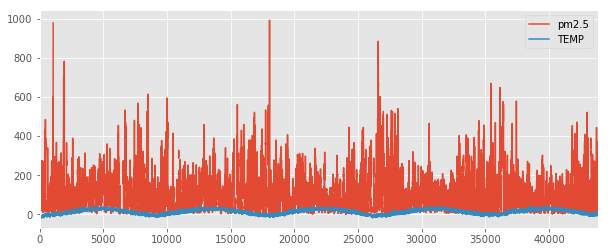

In [501]:
df.plot(y=["pm2.5", "TEMP"])

It looks like when temperature dips, pm2.5 spikes! (There are various statistical ways to confirm this suspicion, but for now we're going to stick with drawing the graphs.)

### Histograms

A histogram is a kind of plot that helps you understand how data are *distributed*. Understanding distribution helps you better reason about how often particular values are found in your data, and helps you easily formulate hypotheses about the phenomena your data is tracking. Let's look at a histogram of temperature data in our Beijing data set, using the `hist` plot kind:

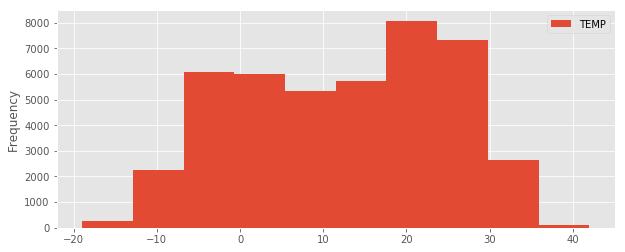

In [496]:
df.plot(kind="hist", y="TEMP")

Each bar in this graph corresponds to a "bin" of values surrounding the value on the X axis. When drawing a histogram, Pandas looks at each item in the data and puts it in the bin corresponding to the closest value. So for example, the graph above tells us that there are a lot of temperature readings (~8000) around 20 degrees C, but very few (less than 300) readings around 40 degrees C. You can increase the "resolution" of the histogram by providing a `bins` named parameter:

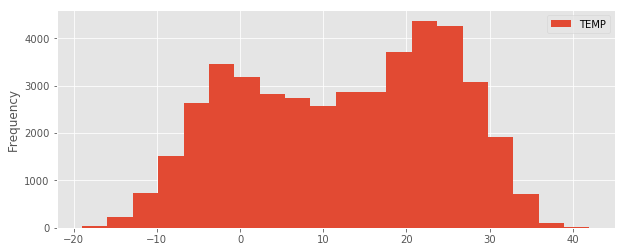

In [515]:
df.plot(kind="hist", y="TEMP", bins=20)

From this graph, we might hypothesize that a way to characterize Beijing temperatures is that they mostly cluster in either the 20—30 degrees C range, or the -5 to +5 degrees C range. Temperatures above 40 degrees C or below -20 degrees C are rare. The histogram for temperatures looks very different from the histogram for PM2.5:

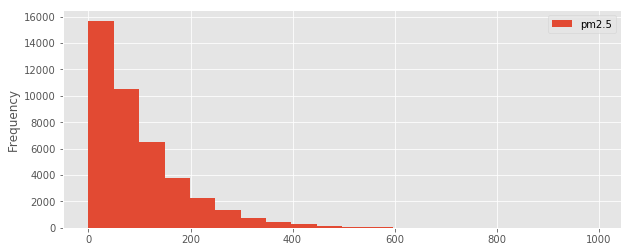

In [502]:
df.plot(kind="hist", y="pm2.5", bins=20)

This histogram shows that while there are a number of outliers, by far most of the PM2.5 readings are in the 0–200 range.

### Scatter plots

A scatter plot is an easy way to confirm your suspicion that two columns in your data set are somehow related. In a scatter plot, you select two columns, and every row in the data set becomes a point in a two-dimensional space, based on the value of those two columns in the row. You need to specify both columns using the `x` and `y` named parameters. So, for example, here's a scatter plot with temperature and dew point:

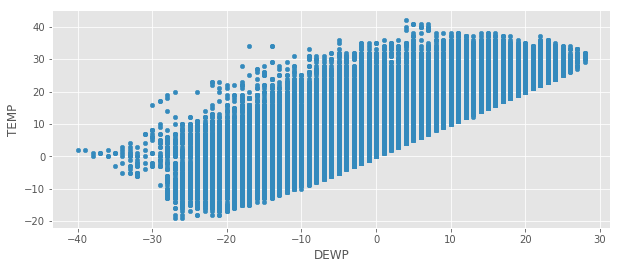

In [528]:
df.plot(kind="scatter", x="DEWP", y="TEMP")

Each dot in this scatterplot represents a row from the DataFrame. (Sometimes these dots are so dense that they appear to form solid masses or lines.) This scatter plot shows that as the temperature rises, so does the dew point ([as you might expect from the definition of dew point](https://en.wikipedia.org/wiki/Dew_point)). One way to talk about this relationship is to say that the values in these two columns are *correlated*.

However, drawing a scatter plot of PM2.5 concentration with the cumulative wind speed shows an inverse relationship:

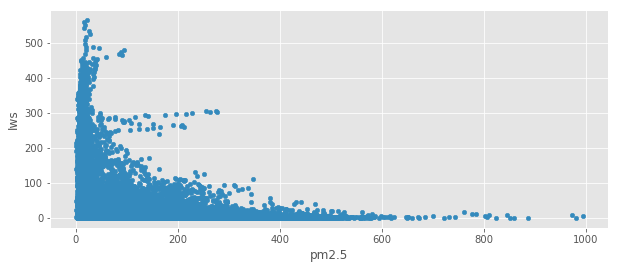

In [539]:
df.plot(kind="scatter", x="pm2.5", y="Iws")

You might interpret this graph as an indication that in general, as the wind speed goes up, the PM2.5 concentration falls. (This is intuitively true, and the authors of the paper go into a bit more detail about this effect in particular.) A scatter plot of PM2.5 and dew point also shows a correlation:

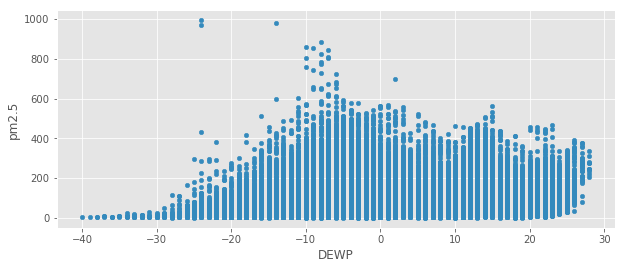

In [542]:
df.plot(kind="scatter", x="DEWP", y="pm2.5")

Again, this is a Pandas tutorial, not a statistics tutorial, so take these characterizations with a grain of salt. My goal here is to show you how histograms and scatter plots are good starting points for getting a "feel" for your data and how the variables might be related.

### Answering questions with selection

Let's say we wanted to find out how many readings in the data had a PM2.5 concentration of greater than 500. One easy way to do this is to use Boolean indexing, as discussed above. The following expression gives us a Boolean Series, with True values for every row with a PM2.5 greater than 400:

In [557]:
df["pm2.5"] > 400

0        False
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
         ...  
43812    False
43813    False
43814    False
43815    False
43816    False
43817    False
43818    False
43819    False
43820    False
43821    False
43822    False
43823    False
Name: pm2.5, Length: 43824, dtype: bool

And then we can use that to subscript the DataFrame, giving us a new DataFrame with only the rows where the condition obtains:

In [558]:
df[df["pm2.5"] > 400]

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
412,413,2010,1,18,4,407.0,-13,-11.0,1028.0,NW,7.60,0,0
427,428,2010,1,18,19,408.0,-7,-3.0,1025.0,SE,0.89,0,0
428,429,2010,1,18,20,435.0,-5,-2.0,1026.0,cv,0.89,0,0
429,430,2010,1,18,21,403.0,-5,-1.0,1026.0,NW,1.79,0,0
431,432,2010,1,18,23,402.0,-6,-1.0,1026.0,cv,0.89,0,0
450,451,2010,1,19,18,485.0,-3,1.0,1018.0,cv,0.89,0,0
451,452,2010,1,19,19,426.0,-3,2.0,1020.0,NW,1.79,0,0
452,453,2010,1,19,20,403.0,-3,1.0,1020.0,NW,4.92,0,0
1057,1058,2010,2,14,1,980.0,-14,-7.0,1029.0,cv,0.89,0,0
1059,1060,2010,2,14,3,599.0,-14,-6.0,1030.0,NW,6.26,0,0


Pandas tells us that there are 545 such rows. With this limited DataFrame, we can still draw plots! So, for example, if we wanted to see a temperature histogram just for these days:

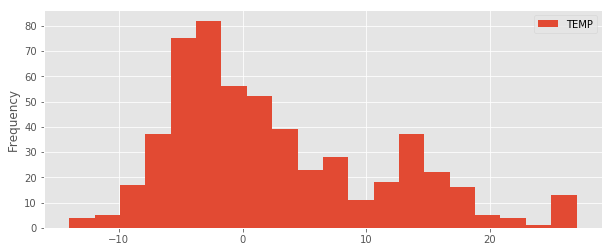

In [564]:
df[df["pm2.5"] > 400].plot(kind="hist", y="TEMP", bins=20)

Comparing this distribution to the rows where PM2.5 is less than 400:

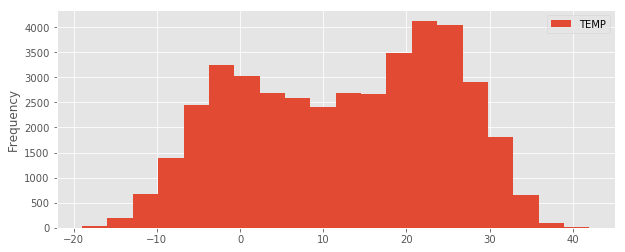

In [566]:
df[df["pm2.5"] < 400].plot(kind="hist", y="TEMP", bins=20)

You can see that the two distributions are quite different, with the temperatures on days with high PM2.5 concentrations being lower on average.

### Value counts and bar charts

The `cbwd` indicates the prevailing wind direction, which the researchers have narrowed down to four distinct values: NE (northeast), NW (northwest), SE (southeast) and "cv" ("calm or variable"). They outline the reasons for recording the data this way in their paper. The values in this column, unlike the values in the other columns, consist of a discrete set, rather than continuous numbers. As such, Pandas will be confused if we ask for a plot:

In [570]:
df["cbwd"].plot()

TypeError: Empty 'DataFrame': no numeric data to plot

The "no numeric data to plot" error is Pandas saying, "hey you wanted me to draw a graph, but there are no numbers in this field, what gives." Probably the best way to visualize discrete values is by *counting them* and then drawing a bar graph. As discussed earlier, the `.value_counts()` method returns a Series that counts how many times each value occurs in a column:

In [571]:
df["cbwd"].value_counts()

SE    15290
NW    14150
cv     9387
NE     4997
Name: cbwd, dtype: int64

Plotting this data as a bar chart shows us how many times each of these discrete values were recorded:

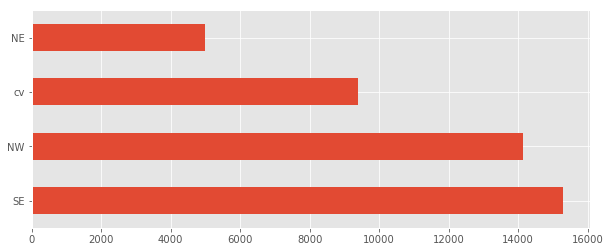

In [573]:
df["cbwd"].value_counts().plot(kind="barh")

## Other topics to cover

TK

### Sorting

In [437]:
sorted_df = df.sort_values(by=["pm2.5"], ascending=False)

In [574]:
sorted_df

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
18049,18050,2012,1,23,1,994.0,-24,-12.0,1032.0,NW,4.92,0,0
1057,1058,2010,2,14,1,980.0,-14,-7.0,1029.0,cv,0.89,0,0
18050,18051,2012,1,23,2,972.0,-24,-12.0,1032.0,NW,8.05,0,0
26588,26589,2013,1,12,20,886.0,-8,-7.0,1023.0,cv,1.34,0,0
26590,26591,2013,1,12,22,858.0,-10,-9.0,1024.0,cv,0.89,0,0
26589,26590,2013,1,12,21,852.0,-9,-8.0,1023.0,NE,0.89,0,0
26584,26585,2013,1,12,16,845.0,-7,-2.0,1021.0,SE,8.95,0,0
26587,26588,2013,1,12,19,824.0,-8,-7.0,1022.0,cv,0.89,0,0
26585,26586,2013,1,12,17,810.0,-7,-4.0,1021.0,SE,9.84,0,0
26591,26592,2013,1,12,23,805.0,-10,-9.0,1024.0,NW,1.79,0,0


### Group by

In [447]:
monthly_mean_df = df.groupby("month").mean()

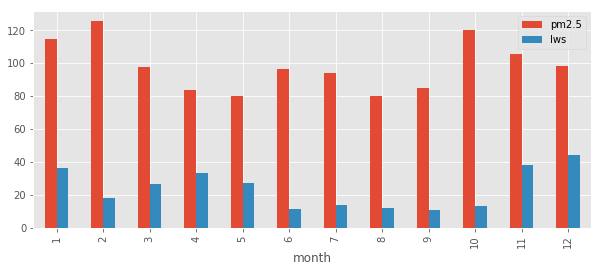

In [575]:
monthly_mean_df.plot(kind="bar", y=["pm2.5", "Iws"])

## Other resources

* [Greg Reda's Pandas Introduction](http://gregreda.com/2013/10/26/intro-to-pandas-data-structures/) is fantastic and I borrowed many ideas from it. Thanks Greg!
* [A great gist with reminders for Pandas indexing syntax](https://gist.github.com/why-not/4582705)